# Introduction to Primitives

Primitives are meant to serve as foundational and elementary building blocks for users to perform quantum computations, developers to implement quantum algorithms, and researchers to solve complex problems and deliver new applications.

But before we go into its significance in terms of quantum computation, let's examine what the term "primitive" actually means and what it implies for us.

On asking to define a primitive element, a **biologist** may likely respond: "A character, trait, or feature that is inherited from the common ancestorial group". A **mathematician's** answer to the same question may be along the lines of, "For finite fields, an element that is a generator of multiplicative element groups of that field".  A **designer working on CAD models** might describe it to you as, "The simplest available shape on a system that can be used to build upon complex geometric forms."

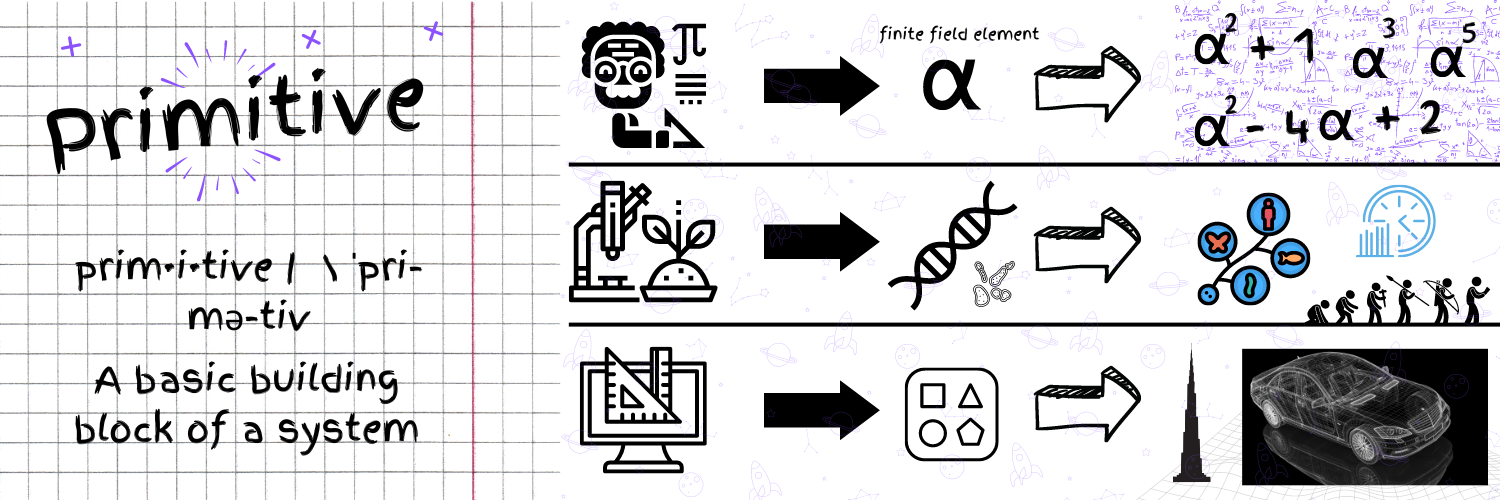

What do we observe from all these responses? All definitions seem to have one thing in common. They ultimately define primitive being a **basic element** that serves as a building block for more complex elements.

Now, if we were to look at it with respect to general computing, what would it mean when we term something as "primitive"? Let's take a look at the concept of language primitives. A language primitive can be defined as a simplest, indivisible element available in a programming language. You have probably heard that everything in a computer is just stored in binary; as zeros and ones, and that is completely true. However, if we were to take binary digits as a primitive construct for programming languages, we would really have a tough time to get things done. So a more appropriate approach would be to define the term primitive with respect to a high level programming language, in such a way that we categorise them into something, _that while being indivisible_, it is still easier to understand and program with.

One good example for this in our language primitive concept are primitive data types. Depending on the language you choose, you will have data types that are generally indivisible and these are used to construct more complex datatypes depending on how you choose using them. For example: `int`, `float`, `string` and `boolean` are _generally considered_ to be the primitive data types in Python, whereas an **array of strings** or, a **list of names**, a **tuple of decimal coordinates** or **set of integers** are non-primitive data types that are built upon the primitive data types.

Now, can we define the same with respect to a general function in programming? You can define a primitive function as a basic interface or segment of code that can be used to build more complex and sophisticated program elements or interfaces depending on how you use them.

## Okay, then what does this have to do with Quantum?

As explained above with respect to a language primitive, although we know that binary digits or machine-code are technically core primitive constructs as a program is compiled down, we still define higher level primitive terms with categorisations that enable us to build a program more accessibly and not at a lower machine code level. Most of the time we expect most major compiled languages to have efficient compiler routines built in, and given that, we are expecting an optimized execution workflow which is optimized for the systems we own. Therefore we can create our programs using the programming language's defined primitives and syntax.

**So now the question with respect to Quantum: Is there a way to define a similar construct for a quantum computation routine and workflow?**

## Introducing Quantum Primitives

To start off defining primitives for quantum, we have two candidates (for now). Although there are several ways to define the fundamental components for a quantum computational procedure, there will be more additions to this primitives construct down the line. For now, let's stick to two basic primitives which we define here. 

With respect to the key information point of interest here, the core capability of quantum computers that sets them apart from classical computers is their ability to generate non-classical probability distributions at their outputs. The inherent nature of highly probabilistic computational results obtained needs us to have multiple runs for the same circuit to generate usable information in the form of probability distributions. The native operations that we can do with probability distributions are to sample from it or to estimate observable quantities from it. 

Based on these two information points of interest here which are: **a) Sampling probability distributions** and **b) Estimating expecation values**, we arrive at our proper named two primitives: **The Sampler** and **The Estimator**.

For a video explaination above, please check out this video on [Quantum primitves here](https://www.youtube.com/watch?v=kyLi8Gswpxo).

### Sampler

The Sampler essentially does what it says in its name. By sampling from its output, it estimates the entire probability distribution of a given quantum circuit so its essence of the result is very much similar to the familiar output of "counts" which you usually get when you run a circuit. This is a program interface that takes a user circuits as an input and generates probabilities. This provides users a way to more efficiently evaluate the possibility of multiple relevant data points which means that they have access to a greater range of information data points that you can use however you like. Few example use cases where Sampler could be of interest are: Grovers search, QSVM routines, Stabilizer computation, Optimization routines, and so on. 

### Estimator

The Estimator is a program interface for calculating and interpreting expectation values for different combinations of quantum states and operators, so it takes circuits and observables and allows users to selectively group between circuits and observables for execution to efficiently calculate and interpret expectation values and variances for a given parameter input. Those who are most interested in finding a final solution to a given problem — but who don’t need to examine the full distribution of counts — will find the Estimator primitive more useful. This routine is something that can be useful to basically most near-term quantum algorithms. The most common examples to be taken are the variational class of algorithms. The Estimator calculates expectation values of quantum observables in addition to a circuit so they are essential to be an input. Such observables can encode a large variety of things such as the electronic structure of a molecule, the cost function for an optimization problem, and much more.

### Specification
Formally speaking, the _Sampler_ and the _Estimator_ primitives are a standardized specification designed for their respective tasks. This means that there is no single `Estimator` or `Sampler` class to solve this task, but rather a family of them; each of which performing the same (internal) calculation on a slightly different way, while exposing a common _application programming interface_ (API) to the users.

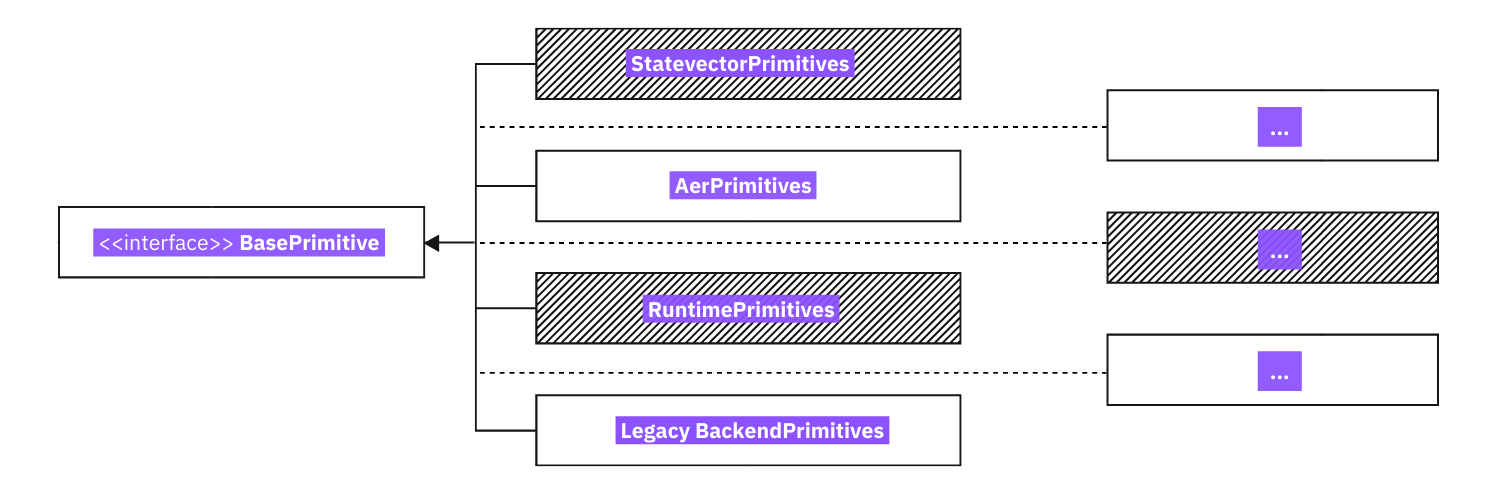

Following now, we shall go forward with Qiskit's native **Aer** implementation of `Estimator` and `Sampler` with **Qiskit's Aer simulators**. You can substitute this with the **Qiskit Runtime Primitives** by following the same routine as before if you wish. Here is a tutorial that will help you **[get started with the Primitive classes residing in Qiskit Terra](https://qiskit.org/documentation/apidoc/primitives.html)**

## Using the Sampler

### Prepare the environment

We shall demonstrate the use of Sampler by using the Bernstein-Vazirani circuit example as shown in the [Qiskit textbook](https://qiskit.org/learn/). For more in detailed information about the Bernstein-Vazirani algorithm, feel free to check out this chapter in the Qiskit Textbook: https://learn.qiskit.org/course/ch-algorithms/bernstein-vazirani-algorithm.

We shall build a general function for the Bernstein-Vazirani algorithm for any general '$n$' bitstring, but feel free to create your own Qiskit circuits to test this out. To learn how to create circuits by using Qiskit, please check the [Circuit basics tutorial](https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html).  

In [1]:
from qiskit import QuantumCircuit 

In [2]:
def bernstein_vazirani(string):
    
    # Save the length of string
    string_length = len(string)
    
    # Make a quantum circuit
    qc = QuantumCircuit(string_length+1, string_length)
    
    # Initialize each input qubit to apply a Hadamard gate and output qubit to |->
    qc.x(string_length)
    qc.h(range(string_length+1))
    qc.barrier()
    
    # Apply an oracle for the given string
    # Note: In Qiskit, numbers are assigned to the bits in a string from right to left 
    string = string[::-1] # Reverse password to fit qiskit's qubit ordering
    for q in range(string_length):
        if string[q] == '1':
            qc.cx(q, string_length)
    qc.barrier()
    
    # Apply Hadamard gates after querying the oracle
    qc.h(range(string_length))
    
    # Measurement
    qc.measure(range(string_length), range(string_length))
    
    return qc

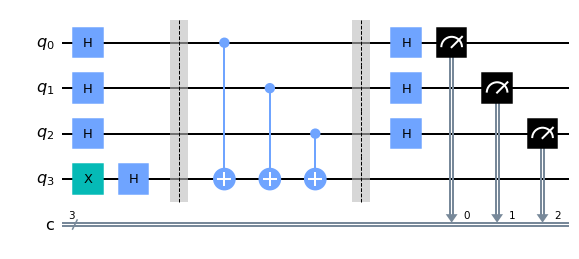

In [3]:
qc1 = bernstein_vazirani('111')
qc1.draw(output="mpl")

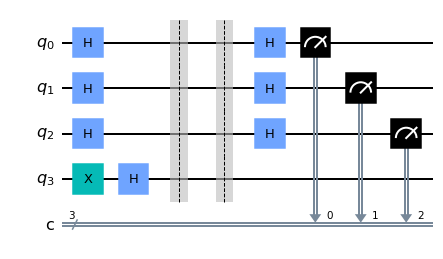

In [4]:
qc2 = bernstein_vazirani('000')
qc2.draw(output="mpl")

2. An instance of Aer Sampler complying with the Sampler primitive specification. 

In [5]:
from qiskit_aer.primitives import Sampler

sampler = Sampler()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Running a single experiment

You can initiate a job run using the `run()` method of the Sampler instance you just created. The method returns a job object which you can use to query for properties like `job_id()` and `status()`.

In [6]:
circuits = [qc1, qc2]

job = sampler.run(circuits)
print(f">>> {job.job_id()}")
print(f">>> {job.status()}")

>>> 963eea72-1741-4459-8fce-fb8072b9df4c
>>> JobStatus.DONE


The `result()` method of the `job_id` will return the `SamplerResult` containing the circuit run results.

In [7]:
result = job.result()
print(f">>> {result}")

>>> SamplerResult(quasi_dists=[{7: 1.0}, {0: 1.0}], metadata=[{'shots': 1024, 'simulator_metadata': {'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2, 3], 'num_clbits': 3, 'parallel_state_update': 8, 'sample_measure_time': 0.000483028, 'num_qubits': 4, 'device': 'CPU', 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}}, {'shots': 1024, 'simulator_metadata': {'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2], 'num_clbits': 3, 'parallel_state_update': 8, 'sample_measure_time': 0.001379661, 'num_qubits': 3, 'device': 'CPU', 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}}])


Finally, to extract different information points from the above result we can extract it from the `SamplerResult`'s attributes:

In [8]:
quasi_dists = result.quasi_dists
metadata = result.metadata

print(f"  > Probability distribution: {quasi_dists}")
print(f"  > Metadata: {metadata}")

  > Probability distribution: [{7: 1.0}, {0: 1.0}]
  > Metadata: [{'shots': 1024, 'simulator_metadata': {'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2, 3], 'num_clbits': 3, 'parallel_state_update': 8, 'sample_measure_time': 0.000483028, 'num_qubits': 4, 'device': 'CPU', 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}}, {'shots': 1024, 'simulator_metadata': {'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2], 'num_clbits': 3, 'parallel_state_update': 8, 'sample_measure_time': 0.001379661, 'num_qubits': 3, 'device': 'CPU', 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}}]


## Example using the Estimator

### Defining the circuit

We shall demonstrate the `Estimator` using a parametrized circuit and the `ZZ` operator as our observable as shown below. In this example we are going to make a random parameterized circuit, but again, feel free to create your own Qiskit circuits to test this out. To learn how to create parametrized circuits and bind parameters to them by using Qiskit, check out the [Advanced Circuits](https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html) tutorials in the Qiskit documentation.

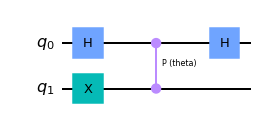

In [9]:
from qiskit.circuit import Parameter

theta = Parameter('theta')

circuit = QuantumCircuit(2)
circuit.x(1)
circuit.h(0)
circuit.cp(theta,0,1)
circuit.h(0)

circuit.draw(output="mpl")

### Defining observables

Here we shall define our observables for our routine. Observables here can represent various physical properties of a quantum system (e.g. energy, spin), and allow said properties to be measured (e.g. their expectation values) for a given state of our system. For simplicity sake, you can use the [PauliSumOp class](https://qiskit.org/documentation/stubs/qiskit.opflow.primitive_ops.html#module-qiskit.opflow.primitive_ops) in Qiskit to define them, as illustrated in the example below.

In [10]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp("ZZ")
print(f"  > Observable: {observable.paulis}")

  > Observable: ['ZZ']


### Defining parameters

We shall also define a few parameters for our circuit. For example's sake, here we shall define `phases` as a varaible that will hold 50 evenly spaced values between 0 and 2$\pi$:

In [11]:
import numpy as np

phases = np.linspace(0, 2*np.pi, 50)

# Phases need to be expressed as a list of lists
parameter_values = [[phase] for phase in phases]

Now that we have our circuit, observables and parameters defined, we shall now define an instance of Aer `Estimator` complying with the Estimator primitive specification to make our run. 

In [12]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

### Run a single experiment

In [13]:
# Ensuring number of circuits and observables are equal to number of parameters passed
circuits = [circuit] * len(phases)
observables = [observable] * len(phases)

job = estimator.run(circuits, observables, parameter_values)
result = job.result()
values = result.values

print(f"  > Observable: {observable.paulis}")
print(f"  > Parameter values: {parameter_values}")
print(f"  > Expectation value: {values}")

  > Observable: ['ZZ']
  > Parameter values: [[0.0], [0.1282282715750936], [0.2564565431501872], [0.38468481472528077], [0.5129130863003744], [0.6411413578754679], [0.7693696294505615], [0.8975979010256552], [1.0258261726007487], [1.1540544441758422], [1.2822827157509358], [1.4105109873260295], [1.538739258901123], [1.6669675304762166], [1.7951958020513104], [1.9234240736264039], [2.0516523452014974], [2.179880616776591], [2.3081088883516845], [2.436337159926778], [2.5645654315018716], [2.6927937030769655], [2.821021974652059], [2.9492502462271526], [3.077478517802246], [3.2057067893773397], [3.333935060952433], [3.4621633325275267], [3.5903916041026207], [3.7186198756777142], [3.8468481472528078], [3.9750764188279013], [4.103304690402995], [4.231532961978089], [4.359761233553182], [4.487989505128276], [4.616217776703369], [4.744446048278463], [4.872674319853556], [5.00090259142865], [5.129130863003743], [5.257359134578837], [5.385587406153931], [5.513815677729024], [5.642043949304118]

You can check the graph plot below, comparing the ideal value for the experiment we ran and the results from the Estimator run.

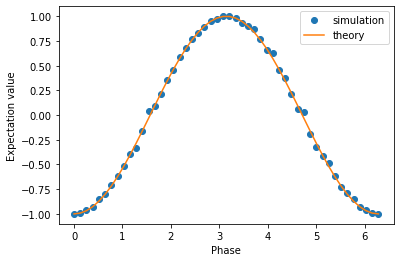

In [14]:
import matplotlib.pyplot as plt

plt.plot(phases, values, 'o', label='simulation')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation value')
plt.legend()

In [15]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright